In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Hardcoding the Input Parameters
Weight = 86 #in Kgs
Height = 1.7 #in metre
SL = 0.285 * Height #Shank Length in metres
TL = 0.245 * Height #Thigh Length in metres
r = 18.4 / 17.1 #Ratio of moment arms about patellofemoral joint of patellar tendon to quadriceps

In [3]:
phi = np.linspace(30,180,1500) #Creating a list of shank to thigh angles

In [4]:
inte = (0.285/0.245 - np.cos(np.radians(phi)))/np.sin(np.radians(phi)) #Intermediate Step for theta
theta = np.degrees(np.arctan2(inte,1)) #Computing theta

In [5]:
MFP = np.cos(np.radians(theta)) * (0.285*(Weight*(1-.0137) + 10)-.0433*0.125*Weight)*Height/0.049 #Computing Patellar Tendon Force
MFQ = r * MFP # Computing Quadriceps Force

In [6]:
Jx = -MFP * np.cos(np.radians(theta)) #Computing x Component of Tibiofemoral Joint Reaction
Jy = (0.0433+0.0137)*Weight - (Weight + 10) - MFP * np.sin(np.radians(theta)) #Computing y Component of Tibiofemoral Joint Reaction
Jm = np.power((np.power(Jx,2) + np.power(Jy,2)),.5)

In [7]:
Qx = MFP * np.cos(np.radians(theta)) + MFQ * np.cos(np.radians(phi - theta)) #Computing x Component of Patellofemoral Joint Reaction
Qy = MFP * np.sin(np.radians(theta)) - MFQ * np.sin(np.radians(phi - theta)) #Computing y Component of Patellofemoral Joint Reaction
Qm = np.power((np.power(Qx,2) + np.power(Qy,2)),.5) #Computing magnitude of Patellofemoral Joint Reaction

In [8]:
data = pd.DataFrame(np.array([phi, MFP, Jx, Jy, Jm, Qx, Qy, Qm]).transpose(), columns= ['phi','MFP','Jx','Jy','Jm','Qx','Qy','Qm'])
data

,phi,MFP,Jx,Jy,Jm,Qx,Qy,Qm
0,30.000000,7.920383e+02,-6.808197e+02,-495.831551,842.237714,1.533002e+03,4.156011e+02,1.588339e+03
1,30.100067,7.920551e+02,-6.808485e+02,-495.815897,842.251765,1.533067e+03,4.140670e+02,1.588001e+03
2,30.200133,7.920692e+02,-6.808729e+02,-495.802630,842.263671,1.533122e+03,4.125397e+02,1.587656e+03
3,30.300200,7.920809e+02,-6.808929e+02,-495.791728,842.273453,1.533167e+03,4.110194e+02,1.587305e+03
4,30.400267,7.920900e+02,-6.809086e+02,-495.783172,842.281129,1.533202e+03,4.095058e+02,1.586948e+03
5,30.500334,7.920967e+02,-6.809201e+02,-495.776941,842.286719,1.533228e+03,4.079990e+02,1.586585e+03
6,30.600400,7.921009e+02,-6.809273e+02,-495.773015,842.290240,1.533244e+03,4.064990e+02,1.586216e+03
7,30.700467,7.921027e+02,-6.809303e+02,-495.771375,842.291712,1.533251e+03,4.050056e+02,1.585840e+03
8,30.800534,7.921020e+02,-6.809292e+02,-495.771999,842.291151,1.533249e+03,4.035188e+02,1.585459e+03
9,30.900600,7.920989e+02,-6.809239e+02,-495.774869,842.288578,1.533237e+03,4.020387e+02,1.585071e+03


Text(0, 0.5, 'Patellar Muscle Force in Newtons')

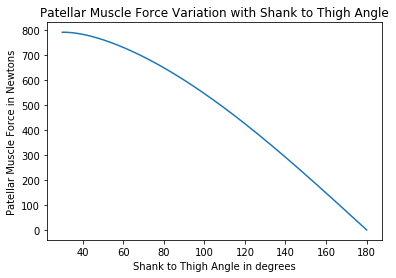

In [9]:
plt.plot(phi, MFP)
plt.title('Patellar Muscle Force Variation with Shank to Thigh Angle')
plt.xlabel('Shank to Thigh Angle in degrees')
plt.ylabel('Patellar Muscle Force in Newtons')

Text(0, 0.5, 'Tibiofemoral Joint Reaction x-component in N')

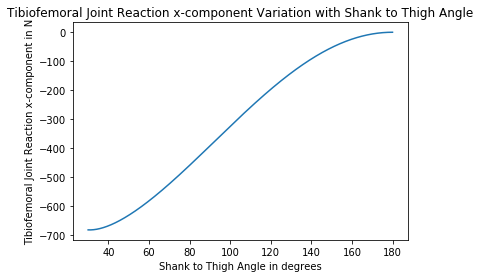

In [10]:
plt.plot(phi, Jx)
plt.title('Tibiofemoral Joint Reaction x-component Variation with Shank to Thigh Angle')
plt.xlabel('Shank to Thigh Angle in degrees')
plt.ylabel('Tibiofemoral Joint Reaction x-component in N')

Text(0, 0.5, 'Tibiofemoral Joint Reaction y-component in N')

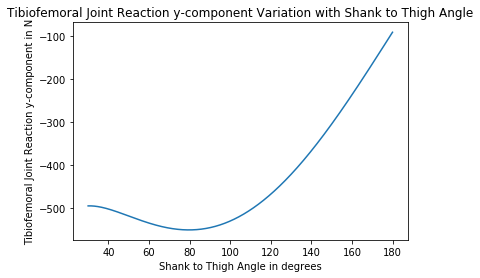

In [11]:
plt.plot(phi, Jy)
plt.title('Tibiofemoral Joint Reaction y-component Variation with Shank to Thigh Angle')
plt.xlabel('Shank to Thigh Angle in degrees')
plt.ylabel('Tibiofemoral Joint Reaction y-component in N')

Text(0, 0.5, 'Tibiofemoral Joint Reaction Magnitude in N')

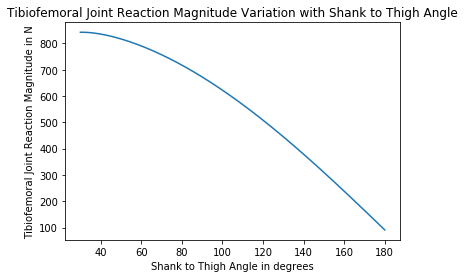

In [12]:
plt.plot(phi, Jm)
plt.title('Tibiofemoral Joint Reaction Magnitude Variation with Shank to Thigh Angle')
plt.xlabel('Shank to Thigh Angle in degrees')
plt.ylabel('Tibiofemoral Joint Reaction Magnitude in N')

Text(0, 0.5, 'Patellofemoral Joint Reaction x-component in N')

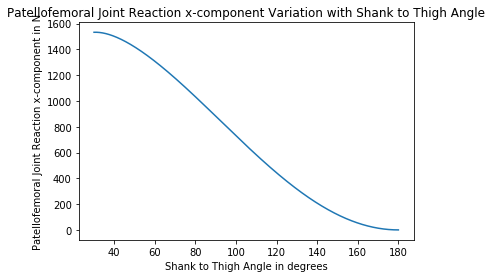

In [13]:
plt.plot(phi, Qx)
plt.title('Patellofemoral Joint Reaction x-component Variation with Shank to Thigh Angle')
plt.xlabel('Shank to Thigh Angle in degrees')
plt.ylabel('Patellofemoral Joint Reaction x-component in N')

Text(0, 0.5, 'Patellofemoral Joint Reaction y-component in N')

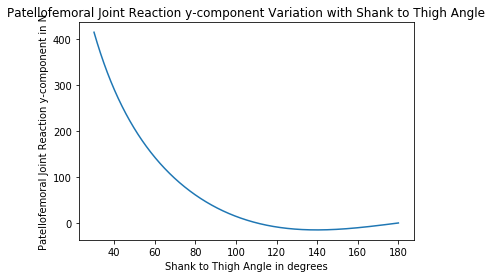

In [14]:
plt.plot(phi, Qy)
plt.title('Patellofemoral Joint Reaction y-component Variation with Shank to Thigh Angle')
plt.xlabel('Shank to Thigh Angle in degrees')
plt.ylabel('Patellofemoral Joint Reaction y-component in N')

Text(0, 0.5, 'Patellofemoral Joint Reaction Magnitude in N')

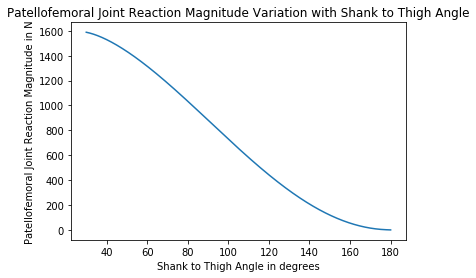

In [15]:
plt.plot(phi, Qm)
plt.title('Patellofemoral Joint Reaction Magnitude Variation with Shank to Thigh Angle')
plt.xlabel('Shank to Thigh Angle in degrees')
plt.ylabel('Patellofemoral Joint Reaction Magnitude in N')